# IRIS CLASSIFICATION USING K-MEANS CLUSTERING

## 1. Loading and Preprocessing

In [18]:
# importing the libraries
import pandas as pd
import numpy as np
from pandas.core.common import random_state
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('iris.data', header=None) # Header None we exclude the first row
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We have *5 columns* in the dataset.

In [19]:
df.info() # Getting dataset information including datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We see we only have `1` categorical value
We will be checking null values and describe the characteristics

In [20]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [21]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2 = df.copy()
df2.iloc[:, -1] = le.fit_transform(df2.iloc[:, -1])  # Encoding the last column

X = df2
y = df2.iloc[:, -1]
X.head(), y.head()

(     0    1    2    3  4
 0  5.1  3.5  1.4  0.2  0
 1  4.9  3.0  1.4  0.2  0
 2  4.7  3.2  1.3  0.2  0
 3  4.6  3.1  1.5  0.2  0
 4  5.0  3.6  1.4  0.2  0,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: 4, dtype: object)

## 2. K-Means Model

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [32]:
#
kmeans.cluster_centers_

array([[5.9  , 2.76 , 4.25 , 1.326, 1.02 ],
       [5.006, 3.418, 1.464, 0.244, 0.   ],
       [6.624, 2.984, 5.562, 2.026, 1.98 ]])

In [33]:
kmeans.inertia_

87.354

In [34]:
labels = kmeans.labels_
print(f'First 10 Labels: {labels[:10]}')

First 10 Labels: [1 1 1 1 1 1 1 1 1 1]


In [37]:
type(y), type(labels)

(pandas.core.series.Series, numpy.ndarray)

In [38]:
correct_labels = sum(y == labels)
print(f'Correct Labels: {correct_labels} out of {len(y)}')

Correct Labels: 49 out of 150


In [39]:
accuracy = correct_labels / len(y)
print(f'Accuracy: {accuracy}')

Accuracy: 0.32666666666666666


We have very poor results with the model 49 out of 150 and accuracy 0.32 is very low

## 2.2 Using K-Means to find optimal number of clusters

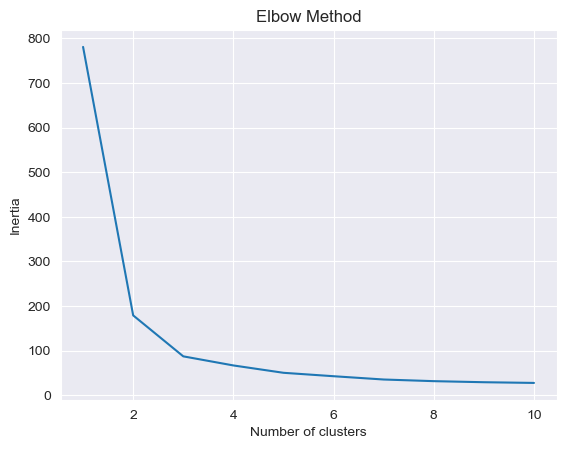

In [42]:
import matplotlib.pyplot as plt
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10, max_iter=300, init='k-means++')
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

We can see the following from the elbow plot
1. There is a kink at k = 2 and 3 which we can use to cluster
Now the code for `k=2`

In [43]:
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2.fit(X)
labels = kmeans2.labels_
correct_labels = sum(y == labels)
print(f'Correct Labels: {correct_labels} out of {len(y)}')
accuracy = correct_labels / len(y)
print(f'Accuracy: {accuracy}')

Correct Labels: 98 out of 150
Accuracy: 0.6533333333333333


> We have improved our accuracy a little compared to the previous one

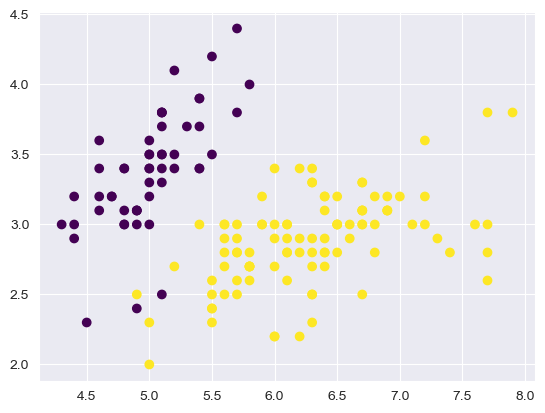

In [54]:
plt.scatter(X[0], X[1], c=kmeans2.labels_, cmap='viridis')
plt.show()

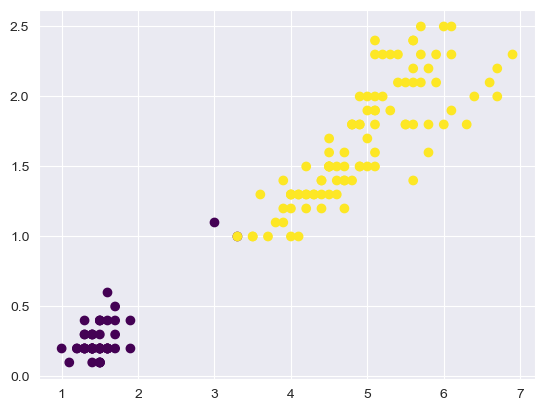

In [50]:
plt.scatter(X[2], X[3], c=kmeans2.labels_, cmap='viridis')
plt.show()